In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
fraud_train_data = pd.read_csv("fraudTest.csv")
fraud_test_data = pd.read_csv("fraudTrain.csv")
fraud_train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
fraud_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
fraud_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [9]:
fraud_train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
fraud_test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
fraud_test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
# Removing Unnamed: 0 Columns
fraud_train_data.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_data.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
fraud_train_data["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [14]:
fraud_test_data["is_fraud"].value_counts()

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [15]:
fraud_train_data["dob"] = pd.to_datetime(fraud_train_data["dob"])
fraud_train_data['trans_date_trans_time'] = pd.to_datetime(fraud_train_data['trans_date_trans_time'])

# Exploratory Data Analysis

# Fraud vs Not Fraud

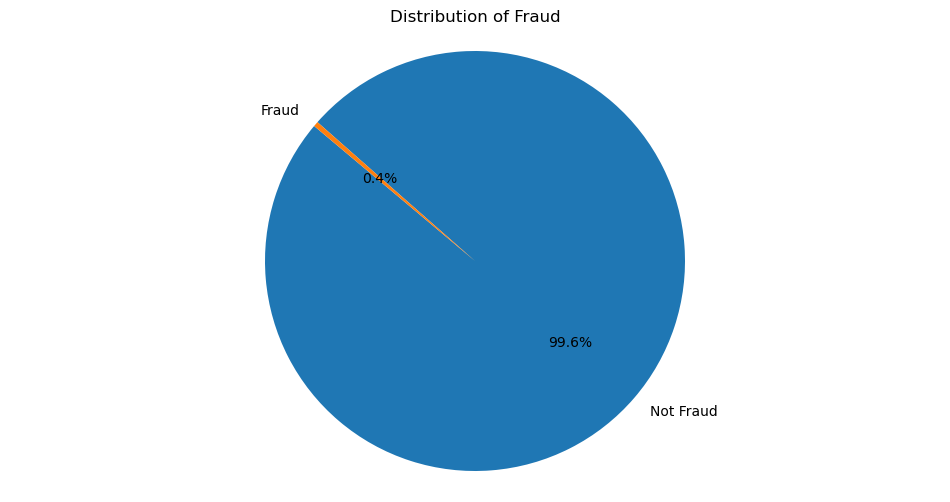

In [16]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = fraud_train_data.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Distribution of Fraud")
plt.axis("equal")
plt.show()

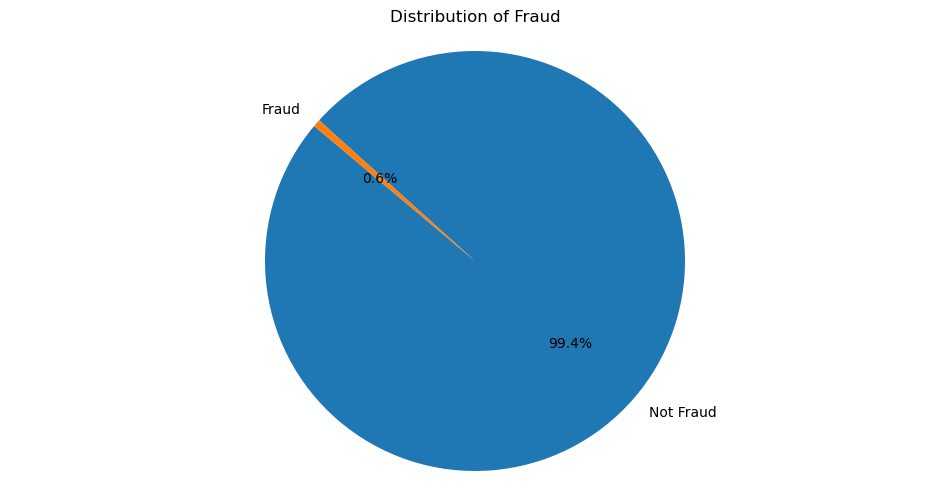

In [17]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = fraud_test_data.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Distribution of Fraud")
plt.axis("equal")
plt.show()

In [18]:
fraud_train_data[fraud_train_data["is_fraud"] == 1]["job"].value_counts()

job
Science writer                 30
Licensed conveyancer           29
Systems developer              29
Engineer, biomedical           28
Colour technologist            27
                               ..
Video editor                    4
Public relations officer        3
Clinical research associate     3
Commercial horticulturist       3
Pilot, airline                  2
Name: count, Length: 177, dtype: int64

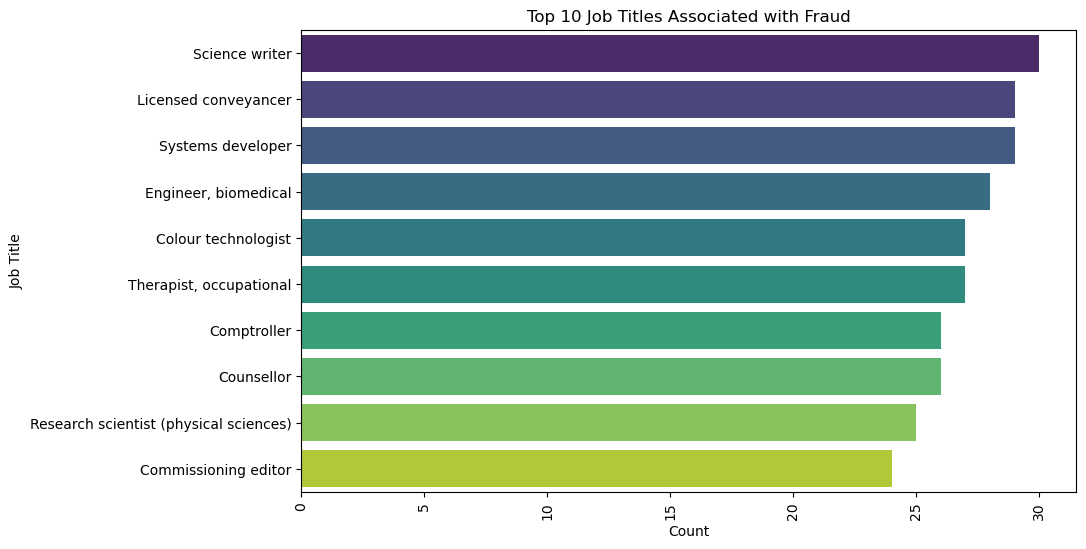

In [19]:
# Extract top 10 job titles associated with fraud and their counts
fraud_job_title = fraud_train_data[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)

# Convert to a DataFrame for easier plotting
fraud_job_title_data = fraud_job_title.reset_index()
fraud_job_title_data.columns = ['job', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_job_title_data, x="count", y="job",palette="viridis",dodge=False)
plt.title('Top 10 Job Titles Associated with Fraud')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

# Count of Transactions per Category

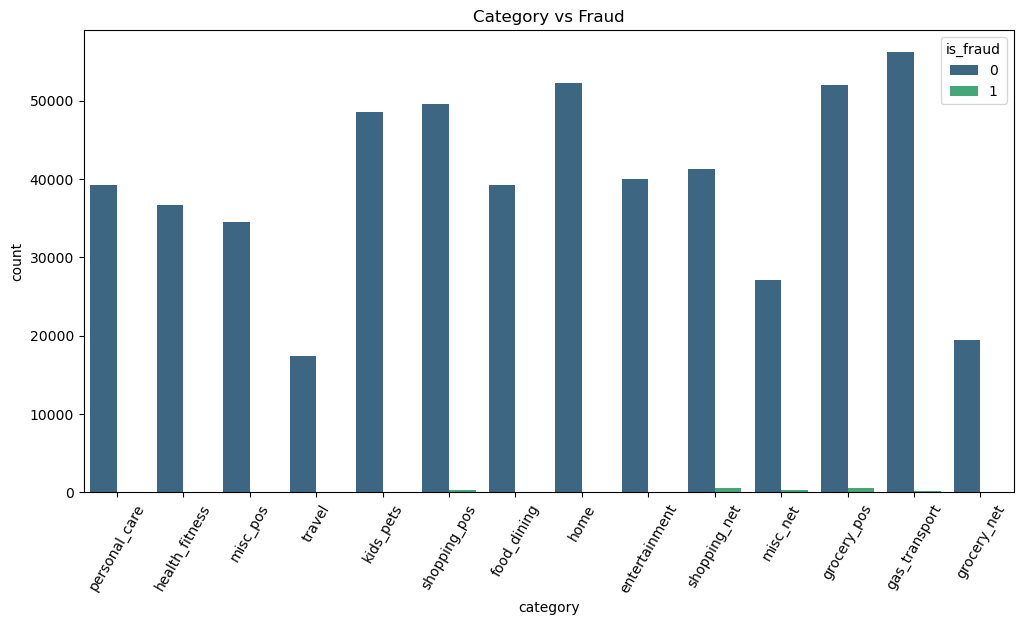

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(x = "category",hue = "is_fraud",data = fraud_train_data,palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

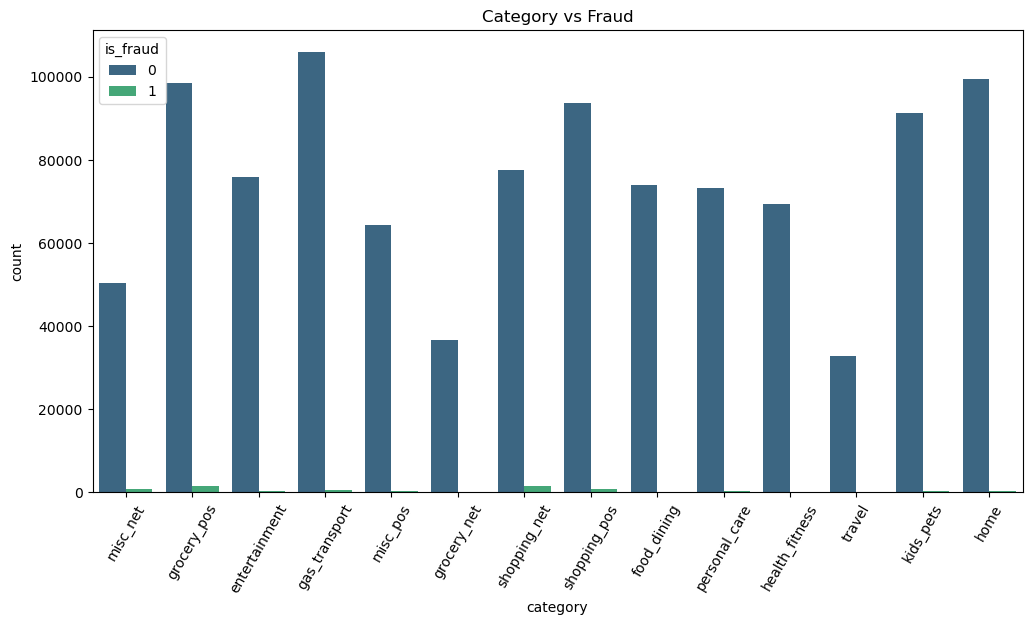

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(x = "category",hue = "is_fraud",data = fraud_test_df,palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

# Category vs Fraud

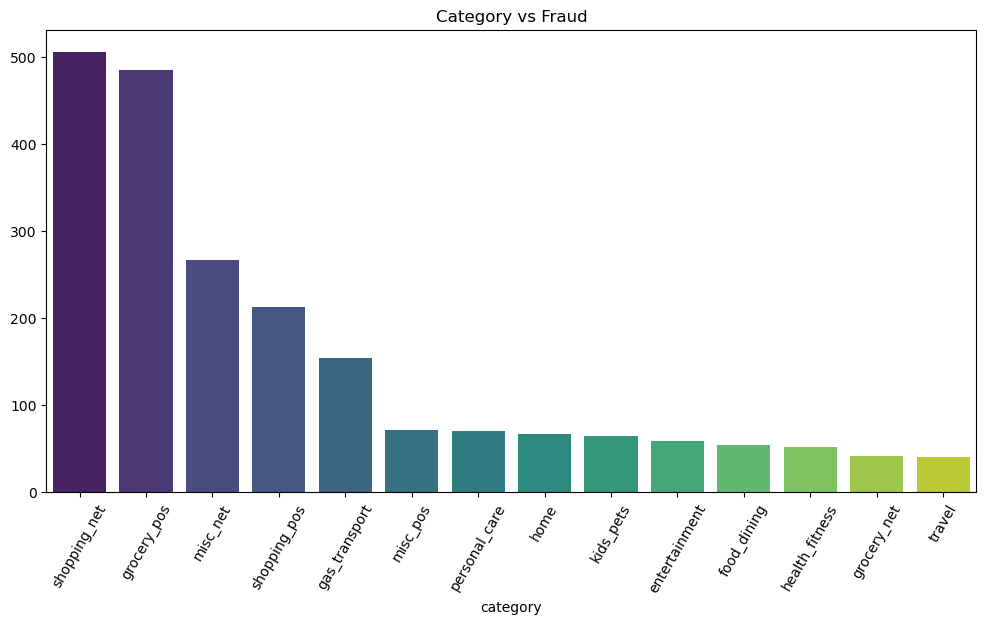

In [22]:
plt.figure(figsize = (12,6))
fraud_category = fraud_train_data[fraud_train_data["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

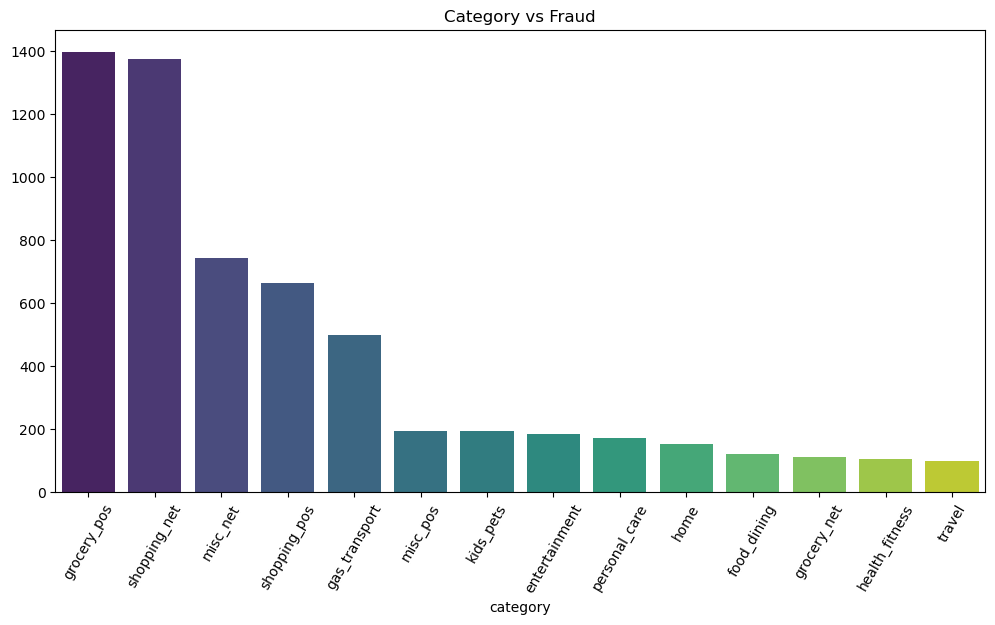

In [23]:
plt.figure(figsize = (12,6))
fraud_category = fraud_test_data[fraud_test_data["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

In [24]:
#Distribution of Transaction Amounts¶
#Given the distribution statistics of the amt column, it seems there are a few high-value transactions that might skew the histogram. To get a clearer view of the bulk of the data, we can limit the x-axis to focus on the more common transaction amounts.

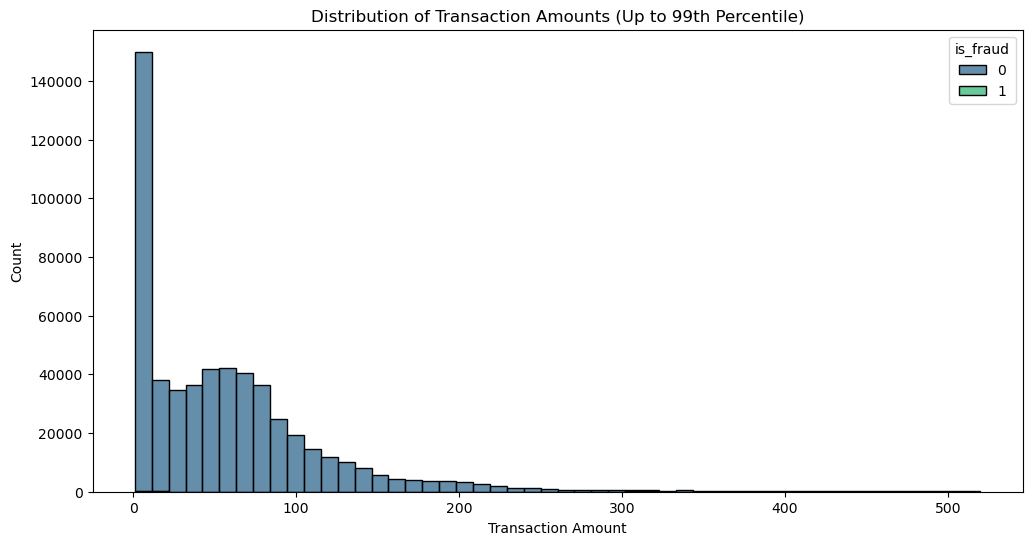

In [26]:
# Calculate the 99th percentile for the 'amt' column
amt = fraud_train_data['amt'].quantile(0.99)
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_train_data[fraud_train_data['amt'] <= amt], x="amt", hue="is_fraud", multiple="stack", bins=50, palette="viridis")
plt.title('Distribution of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

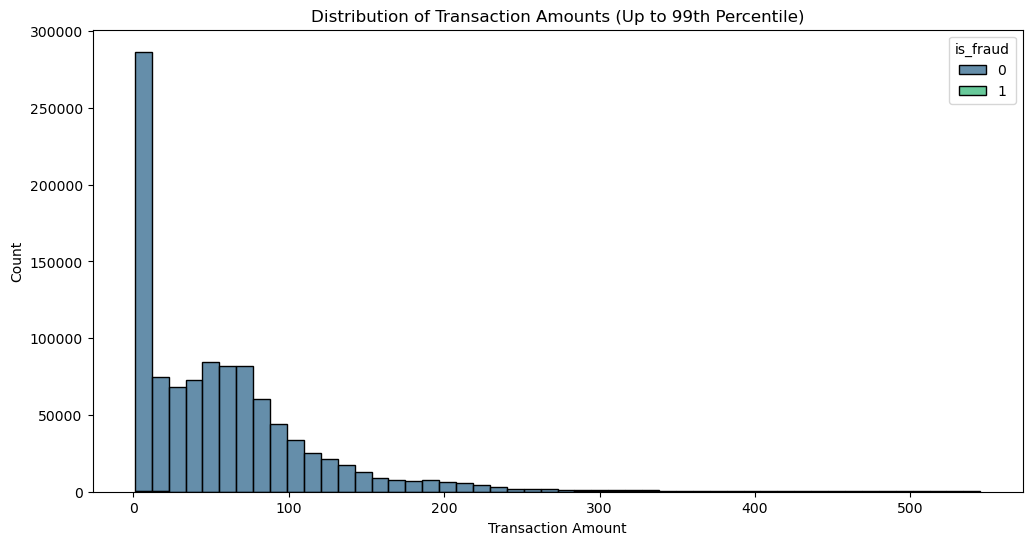

In [27]:
# Calculate the 99th percentile for the 'amt' column
amt = fraud_test_data['amt'].quantile(0.99)
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_test_data[fraud_test_data['amt'] <= amt], x="amt", hue="is_fraud", multiple="stack", bins=50, palette="viridis")
plt.title('Distribution of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# Fraud Rate by State

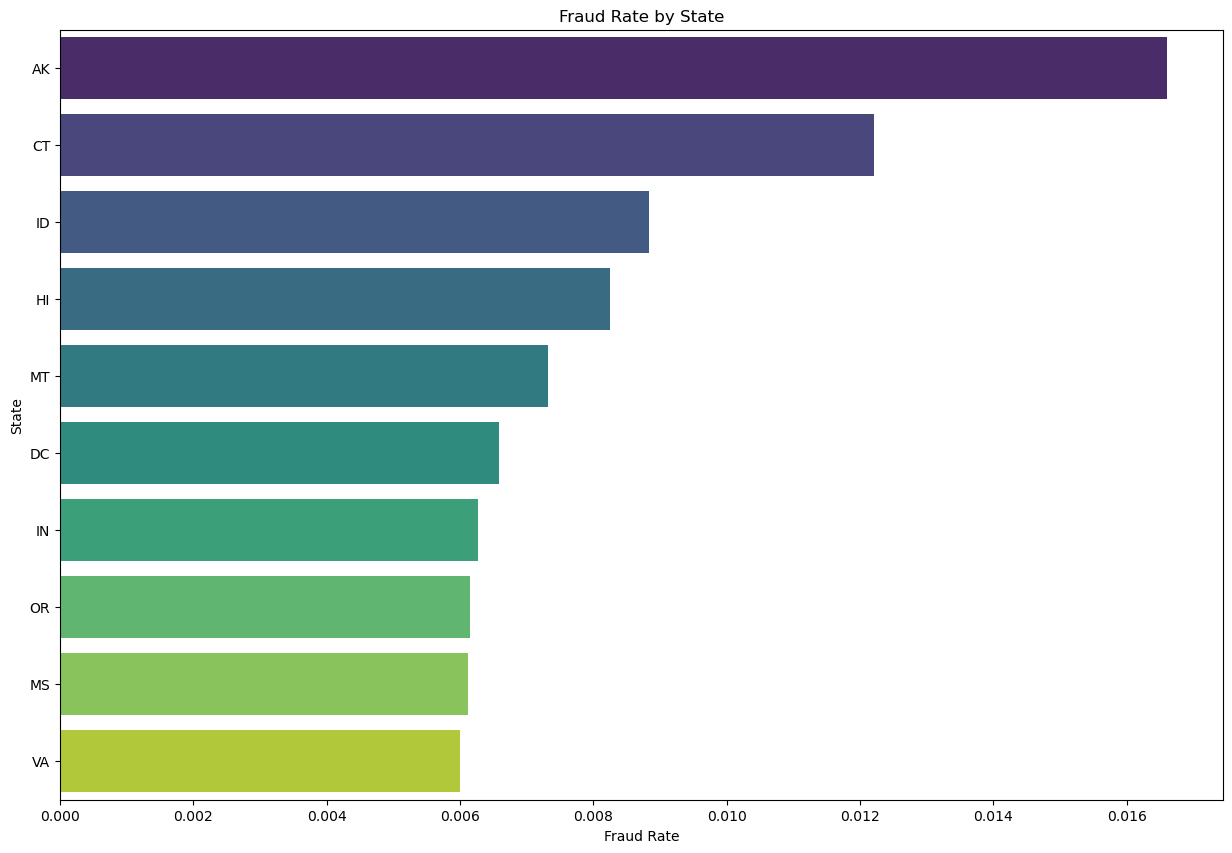

In [28]:
fraud_rate_by_state = fraud_train_data.groupby('state')['is_fraud'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.show()

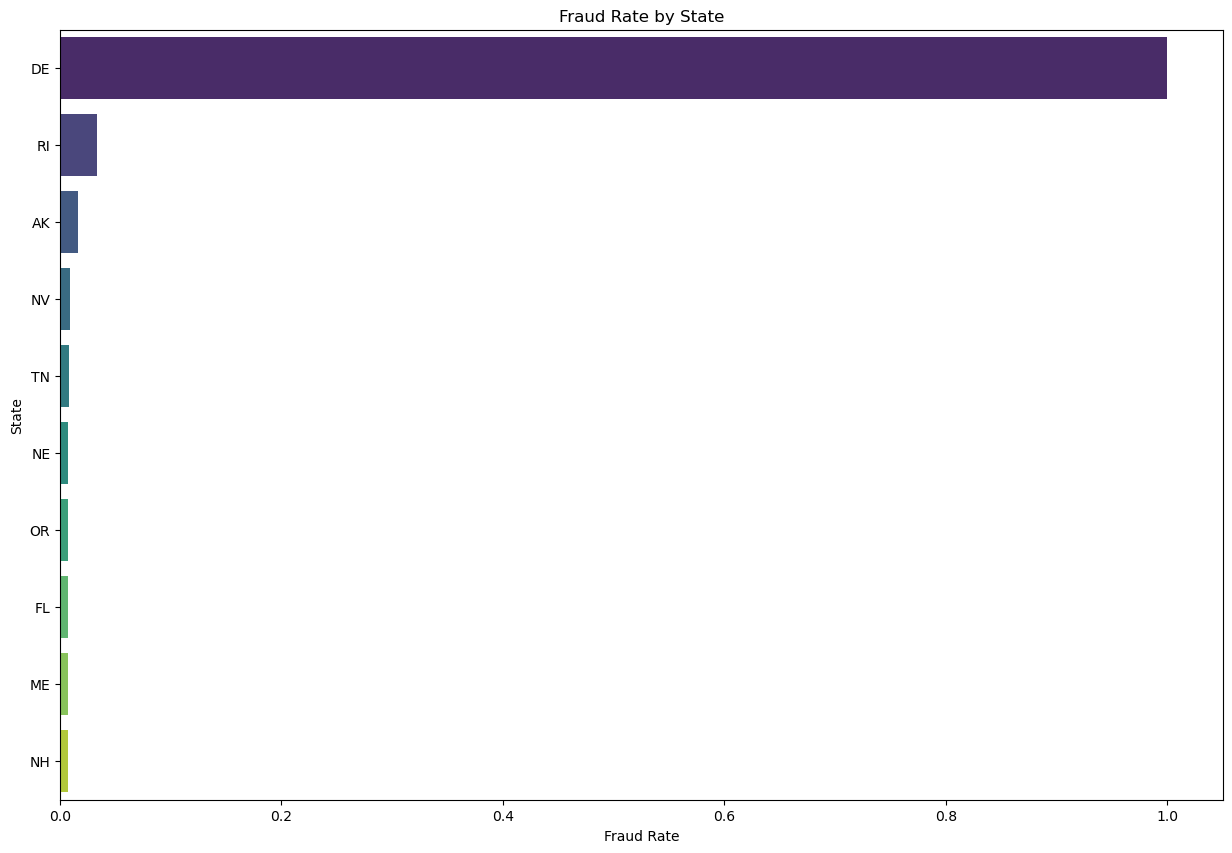

In [29]:
fraud_rate_by_state = fraud_test_data.groupby('state')['is_fraud'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.show()

# Transactions Over Time

In [30]:
fraud_train_data.set_index('trans_date_trans_time', inplace=True)
fraud_test_df.set_index('trans_date_trans_time', inplace=True)

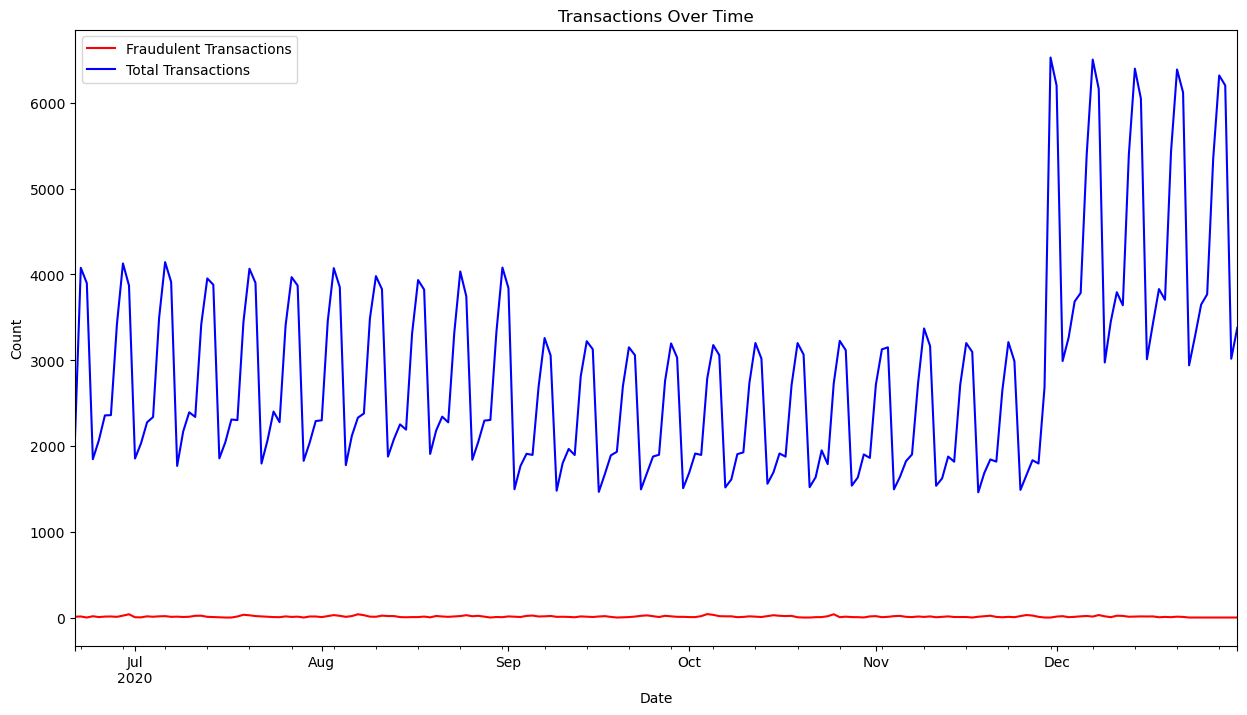

In [31]:
plt.figure(figsize=(15, 8))
fraud_train_data.resample('D')['is_fraud'].sum().plot(label='Fraudulent Transactions', color='red')
fraud_train_data.resample('D')['is_fraud'].count().plot(label='Total Transactions', color='blue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Fraudulent Transaction Locations

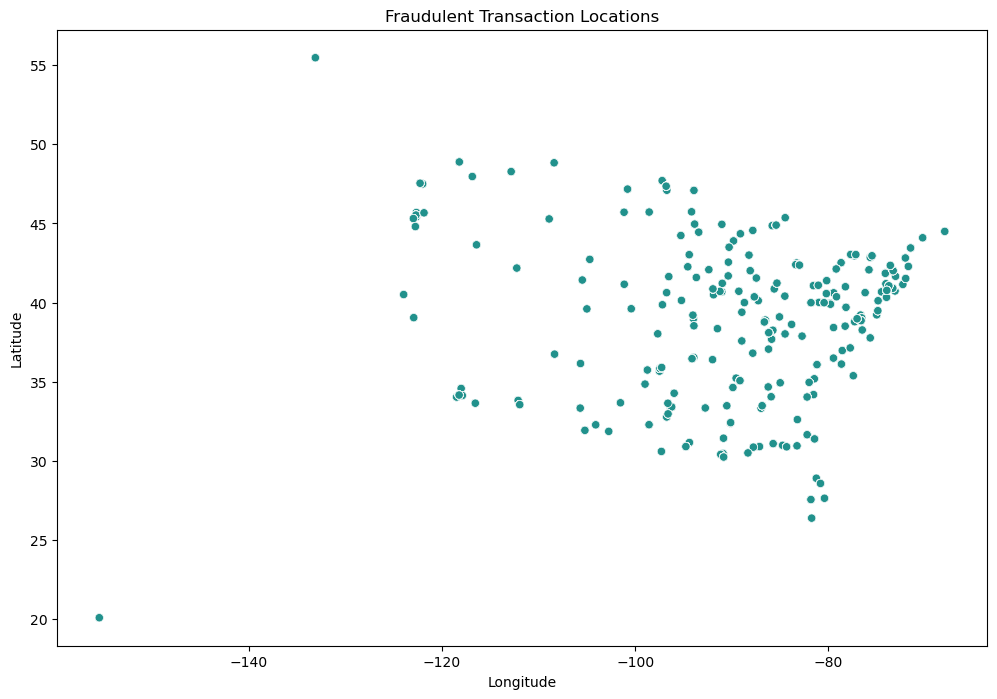

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_train_data[fraud_train_data['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)
plt.title('Fraudulent Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\sreet\AppData\Local\Temp\ipykernel_9864\3017803810.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=fraud_train_df[fraud_test_data['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)


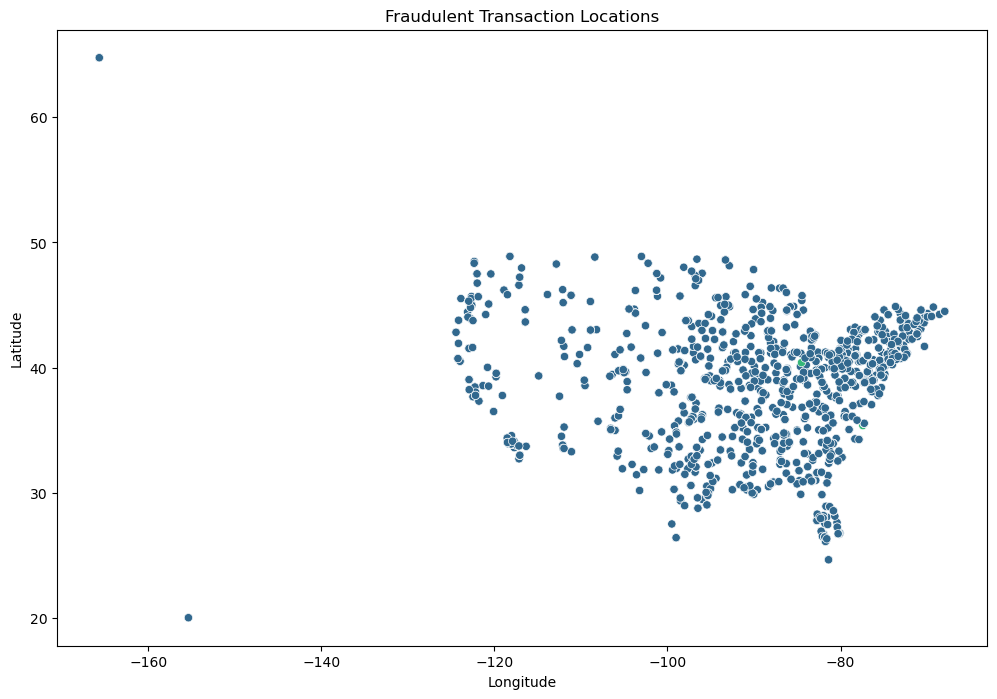

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_train_df[fraud_test_data['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)
plt.title('Fraudulent Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
#Model Training

In [45]:
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")

In [ ]:
#Preprocessing the Data 🧹
#We will clean and preprocess the data to make it suitable for analysis and modeling. This includes handling missing values, encoding categorical variables, and scaling numerical features.

#Steps:
#1.Handle missing values.
#2.Encode categorical variables.
#3.Scale numerical features.

In [46]:
print(data_train.shape[0])
print(data_test.shape[0])

1048575
555719


In [47]:
data = pd.concat([data_train, data_test])
data.shape[0]

1604294

<Axes: xlabel='is_fraud'>

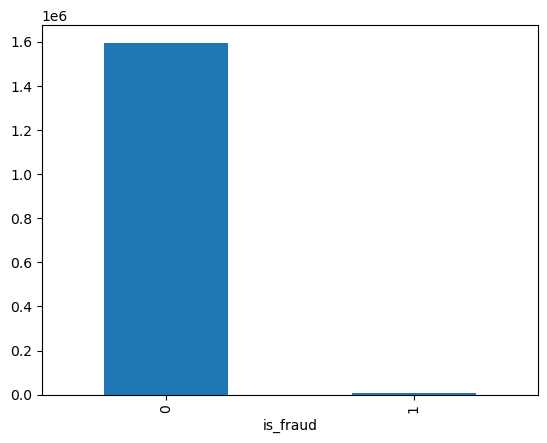

In [48]:
data.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [49]:
fraud = data[data["is_fraud"] == 1]
not_fraud =  data[data["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

8151
1596143


In [50]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
data_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

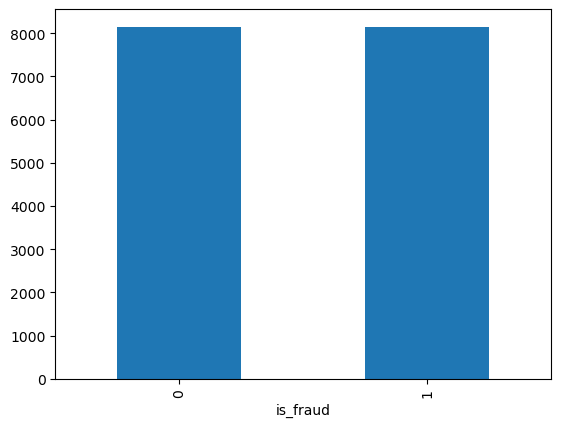

In [51]:
data_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [52]:
data_new.isna().sum().sum()

0

In [53]:
data_new.duplicated().sum()

0

In [54]:
data_new.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2/1/2019 1:06,4.613310e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,15/9/1988,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2/1/2019 1:47,3.401870e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,28/10/1960,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2/1/2019 3:05,3.401870e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,28/10/1960,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2/1/2019 3:38,4.613310e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,15/9/1988,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2/1/2019 3:55,3.401870e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,28/10/1960,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261316,261316,2020-09-25 18:36:09,3.566095e+15,"fraud_Hintz, Bauch and Smith",health_fitness,40.76,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,f6bda5ff814ec6f3bded2c857a674ac7,1380134169,33.947525,-118.367529,0
91333,91333,2020-07-22 19:02:36,4.149636e+12,fraud_Lynch Ltd,shopping_pos,4.29,Samuel,Farrell,M,428 Michael Tunnel Apt. 377,...,33.9778,-86.5598,3996,Aid worker,1977-06-14,6b7ec5da945ce4a536ba9a22a409202b,1374519756,33.187874,-85.732665,0
180744,180744,4/4/2019 16:48,3.518670e+15,fraud_Deckow-O'Conner,grocery_pos,63.33,Dorothy,Thomas,F,537 Rice Square Suite 040,...,39.1657,-84.2330,31394,Hospital doctor,12/11/1996,3bb91704d42ef633451b094c1507d560,1333558100,38.951114,-84.826793,0
242218,242218,2020-09-16 22:18:53,4.169760e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,102.65,Jamie,Carr,F,55363 Aaron Circle Suite 450,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,305b3bac58871a487456b01341c1d5d7,1379369933,41.012484,-77.400021,0


In [ ]:
#Feature Engineering 🛠️
#We will create new features that can help improve the performance of our models.

In [ ]:
#Building the Models 🏗️
#We will build several machine learning models to detect fraudulent transactions. This includes logistic regression, decision trees, random forests, gradient boosting, XGBoost, SVC, KNeighborsClassifier, and GaussianNB.

In [ ]:
#Models to Build:

Logistic Regression
Decision Tree
Random Forest
Gradient Boosting Machine (GBM)
XGBoost
Support Vector Classifier (SVC)
K-Nearest Neighbors (KNeighborsClassifier)

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [66]:
numeric_columns = [i for i in data_new.columns if data_new[i].dtype == 'int64' or data_new[i].dtype =='int32' or data_new[i].dtype =='float64']
categorical_columns = [i for i in data_new.columns if data_new[i].dtype == 'object']

In [68]:
print(numeric_columns)
print(categorical_columns)

['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    data_new[col] = encoder.fit_transform(data_new[col])
data_new

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,4049,4.613310e+12,543,4,281.06,157,306,1,540,...,35.9946,-81.7266,885,428,231,14794,1325466397,36.430124,-81.179483,1
2472,2472,4050,3.401870e+14,285,2,11.52,247,182,0,279,...,29.4400,-98.4590,1595797,229,1443,12070,1325468849,29.819364,-99.142791,1
2523,2523,4052,3.401870e+14,196,4,276.31,247,182,0,279,...,29.4400,-98.4590,1595797,229,1443,11918,1325473523,29.273085,-98.836360,1
2546,2546,4053,4.613310e+12,162,2,7.03,157,306,1,540,...,35.9946,-81.7266,885,428,231,3652,1325475483,35.909292,-82.091010,1
2553,2553,4054,3.401870e+14,328,4,275.73,247,182,0,279,...,29.4400,-98.4590,1595797,229,1443,7703,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261316,261316,7294,3.566095e+15,258,5,40.76,206,415,0,468,...,34.3795,-118.5230,34882,219,742,15728,1380134169,33.947525,-118.367529,0
91333,91333,5667,4.149636e+12,400,12,4.29,289,126,1,423,...,33.9778,-86.5598,3996,17,850,6846,1374519756,33.187874,-85.732665,0
180744,180744,14213,3.518670e+15,130,4,63.33,107,424,0,534,...,39.1657,-84.2330,31394,232,89,3794,1333558100,38.951114,-84.826793,0
242218,242218,7109,4.169760e+15,74,10,102.65,153,62,0,550,...,40.2236,-76.5380,213,431,756,3065,1379369933,41.012484,-77.400021,0


In [71]:
columns = data_new.columns.tolist() 
columns.remove('is_fraud')
X = data_new.drop(['is_fraud'], axis=1)
y = data_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
data_new[X.columns] = X
data_new

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,-1.440197,-0.856783,-0.311439,1.013011,-0.711272,-0.048656,-0.226664,0.395507,1.059946,0.188726,...,-0.519903,0.603374,-0.300181,1.257084,-1.210351,1.411714,-1.561041,-0.430589,0.642327,1
2472,-1.440119,-0.856568,-0.311178,-0.296098,-1.228266,-0.745867,0.693564,-0.504492,-0.943444,-0.733294,...,-1.806172,-0.603139,5.185259,-0.144798,0.929986,0.832876,-1.560912,-1.719064,-0.651305,1
2523,-1.439948,-0.856137,-0.311178,-0.747690,-0.711272,-0.060943,0.693564,-0.504492,-0.943444,-0.733294,...,-1.806172,-0.603139,5.185259,-0.144798,0.929986,0.800577,-1.560665,-1.825537,-0.629237,1
2546,-1.439871,-0.855922,-0.311439,-0.920209,-1.228266,-0.757481,-0.226664,0.395507,1.059946,0.188726,...,-0.519903,0.603374,-0.300181,1.257084,-1.210351,-0.955911,-1.560561,-0.532102,0.576683,1
2553,-1.439847,-0.855707,-0.311178,-0.077913,-0.711272,-0.062443,0.693564,-0.504492,-0.943444,-0.733294,...,-1.806172,-0.603139,5.185259,-0.144798,0.929986,-0.095092,-1.560505,-1.725484,-0.618222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261316,-0.571039,-0.158697,-0.308664,-0.433098,-0.452775,-0.670233,0.274349,1.186635,-0.943444,-0.065624,...,-0.836849,-2.049882,-0.183254,-0.215244,-0.307948,1.610185,1.326352,-0.914462,-2.035779,0
91333,-1.141765,-0.508708,-0.311440,0.287419,1.356706,-0.764569,1.123003,-0.910943,1.059946,-0.224593,...,-0.915678,0.254869,-0.289482,-1.638259,-0.117225,-0.277200,1.029815,-1.062522,0.314429,0
180744,-0.841563,1.329764,-0.308701,-1.082579,-0.711272,-0.611852,-0.737902,1.251958,-0.943444,0.167531,...,0.102391,0.422646,-0.195251,-0.123664,-1.461116,-0.925737,-1.133661,0.060767,0.379665,0
242218,-0.635161,-0.198495,-0.308194,-1.366727,0.839712,-0.510144,-0.267563,-1.375459,-0.943444,0.224053,...,0.309992,0.977505,-0.302493,1.278217,-0.283225,-1.080646,1.285987,0.462540,0.914506,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(),
}

In [75]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [76]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.853726,0.925981,0.768428,0.839879
Decision Tree,0.947255,0.947174,0.947174,0.947174
Random Forest,0.950322,0.971080,0.928133,0.949121
Gradient Boosting,0.937749,0.941723,0.933047,0.937365
SVC,0.865685,0.952128,0.769656,0.851223


In [ ]:
#Evaluating the Models 📈¶
#We will evaluate the performance of our models using various metrics such as accuracy, precision, recall, and the F1 score. We will also plot the ROC curves and calculate the AUC.

#Evaluation Metrics:
#Accuracy Precision Recall F1 Score

In [81]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1570   63]
 [ 375 1253]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1633
           1       0.95      0.77      0.85      1628

    accuracy                           0.87      3261
   macro avg       0.88      0.87      0.86      3261
weighted avg       0.88      0.87      0.86      3261



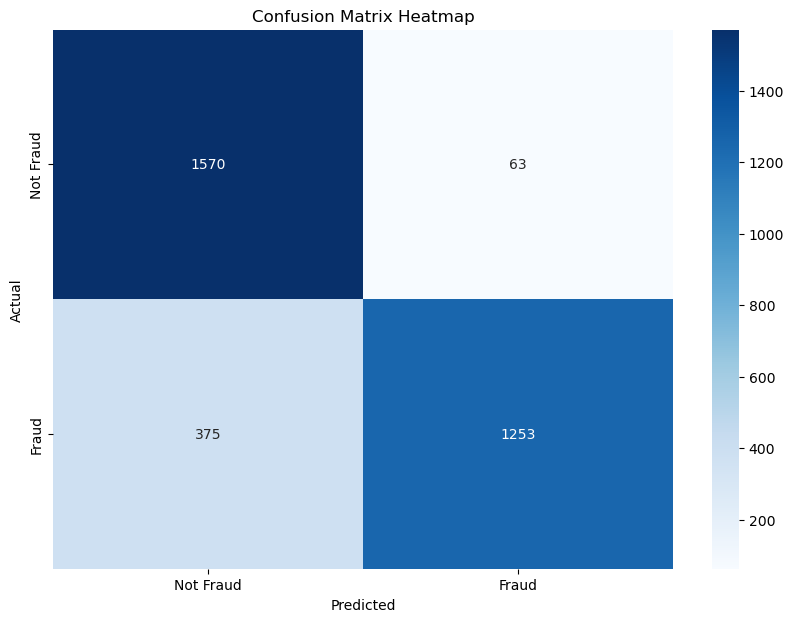

In [83]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()